<a href="https://colab.research.google.com/github/subha9542/Datamining/blob/master/Datamining_HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial import distance_matrix
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

1. [40] Use AGNES algorithm with Euclidean distance and single link to find the hierarchies
of clusters in the following data set.

A(1, 1), B(2, 1), C(2, 3), D(5, 2), E(6, 1), F(7, 3)G(9, 1), H(9, 3)


In [ ]:
df=pd.DataFrame(np.array([[1,1],[2,1],[2,3],[5,2],[6,1],[7,3],[9,1],[9,3]]),columns=['X','Y'],
                index=['A','B','C','D','E','F','G','H'])
df

,X,Y
A,1,1
B,2,1
C,2,3
D,5,2
E,6,1
F,7,3
G,9,1
H,9,3


(a) Trace the algorithm up to the end of the first iteration of the main loop

In [ ]:
distance_matrix=pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)
distance_matrix

,A,B,C,D,E,F,G,H
A,0.000000,1.000000,2.236068,4.123106,5.000000,6.324555,8.000000,8.246211
B,1.000000,0.000000,2.000000,3.162278,4.000000,5.385165,7.000000,7.280110
C,2.236068,2.000000,0.000000,3.162278,4.472136,5.000000,7.280110,7.000000
D,4.123106,3.162278,3.162278,0.000000,1.414214,2.236068,4.123106,4.123106
E,5.000000,4.000000,4.472136,1.414214,0.000000,2.236068,3.000000,3.605551
F,6.324555,5.385165,5.000000,2.236068,2.236068,0.000000,2.828427,2.000000
G,8.000000,7.000000,7.280110,4.123106,3.000000,2.828427,0.000000,2.000000
H,8.246211,7.280110,7.000000,4.123106,3.605551,2.000000,2.000000,0.000000


(b) Draw the points on a piece of paper, find all clusters that would be found by the algorithm (you do not have to show every step in the trace, but you should follow the
algorithm), and draw the resulting Dendrogram.


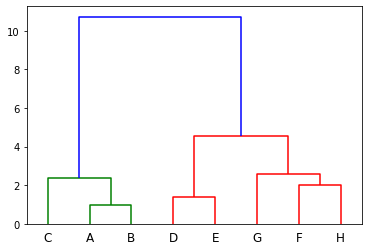

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'),labels=df.index)

2. [60] Write a Jupyter notebook that runs SciKit-Learn clustering algorithms on the given
hwk09.csv datasets.


In [ ]:
df = pd.read_csv('hwk09.csv')
X = np.array(df[:], dtype=np.float)
positions = [0,0,221,222,223,224]

(a) Run k-Means algorithm using several values of k.

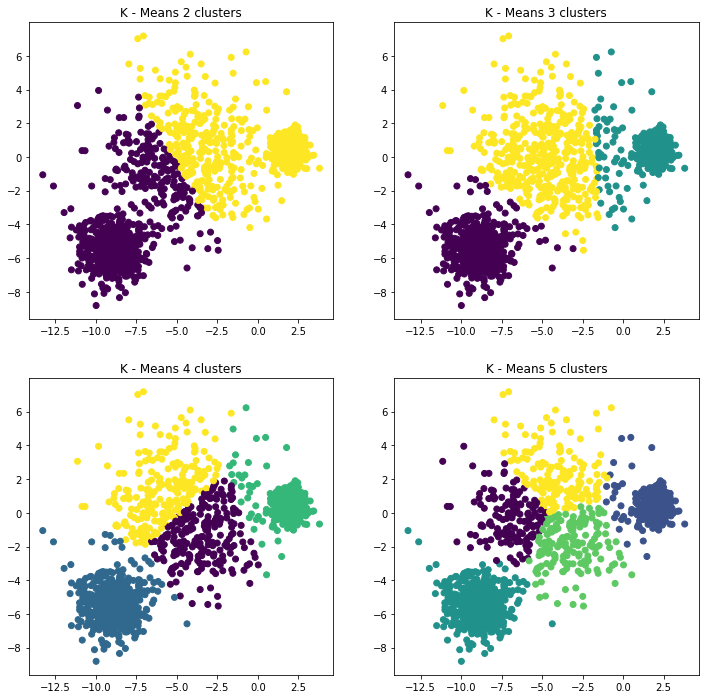

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(2,6):
    k_pred = KMeans(n_clusters=i).fit_predict(X)
    plt.subplot(positions[i])
    plt.scatter(X[:, 0], X[:, 1], c=k_pred)
    plt.title("K - Means "+str(i)+" clusters")

(b) Run DBSCAN algorithm with several pairs of  and minP ts.

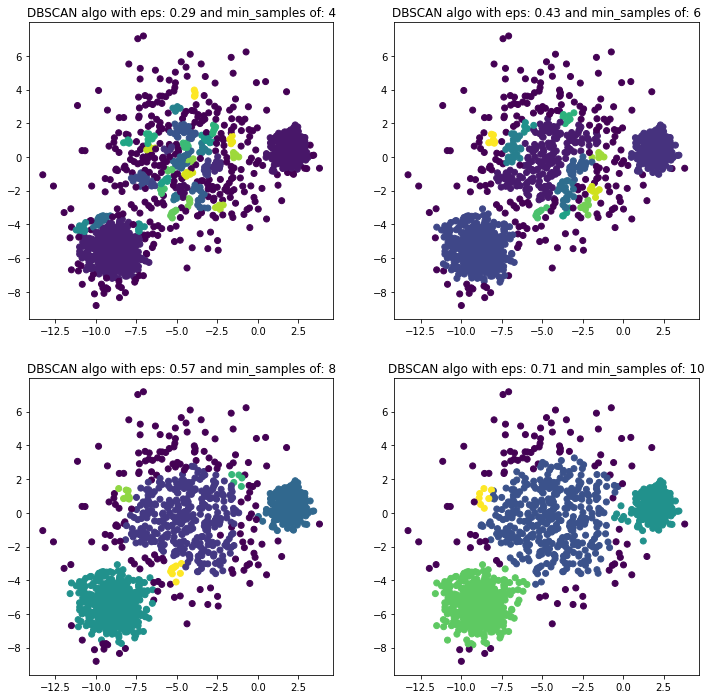

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(2,6):
    db = DBSCAN(eps=i/7, min_samples=i*2).fit(X)
    plt.subplot(positions[i])
    plt.scatter(df['x'], df['y'] ,c=db.labels_)
    plt.title('DBSCAN algo with eps: ' + str(round(i/7,2)) + ' and min_samples of: ' + str(i*2))
    

(c) Run the Agglomerative Clustering algorithm with several pairs of the affinity (the distance measures) and linkage (the linkage criteria). Examples include ’euclidean’ and
’ward’, and ’manhattan’ and ’complete’

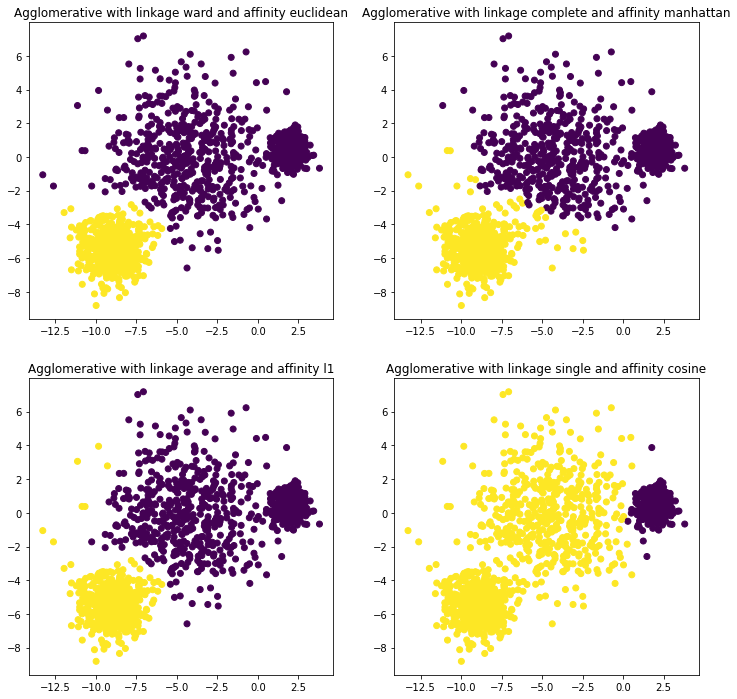

In [ ]:
plt.figure(figsize=(12, 12))
linkage = ["none","none","ward", "complete", "average", "single"]
affinity = ["none","none","euclidean", "manhattan", "l1", "cosine", "l2", " manhattan"]

for i in range(2,6):
    clusterer = AgglomerativeClustering(n_clusters=2,affinity = affinity[i],linkage = linkage[i])
    cluster_labels = clusterer.fit_predict(X)
    plt.subplot(positions[i])
    plt.scatter(X[:, 0], X[:, 1],c = cluster_labels)
    plt.title("Agglomerative with linkage "+linkage[i]+" and affinity "+affinity[i])